# Database_No_show_appointments 

## Introduction


### Import all the packages I will need.

In [1]:
# Import packages that will used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data csv file and print first five rows 
 Discaver information about the data to analysis it

In [2]:
# Load our data and print the first 5 rows
df = pd.read_csv('database_new.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Print the shape of our dataframe
df.shape

(110527, 14)

In [4]:
# Print all information about datafram (dtype , non null count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Note
there is no null value in this database.

In [5]:
# Round data to 3 number after dismil point becouse results were so big
df.describe().round(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000
mean,1.474963e+14,5675305.123,37.089,0.098,0.197,0.072,0.030,0.022,0.321
std,2.560949e+14,71295.752,23.110,0.298,0.398,0.258,0.172,0.162,0.467
min,3.921784e+04,5030230.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.172614e+12,5640285.500,18.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.173184e+13,5680573.000,37.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.439172e+13,5725523.500,55.000,0.000,0.000,0.000,0.000,0.000,1.000
max,9.999816e+14,5790484.000,115.000,1.000,1.000,1.000,1.000,4.000,1.000


# Data Wrangling;


### What will i do
1- convert all database columns to lower                
2- convert patientid from float to int              
3- convert scheduleday and appointmentday from object to datetime

In [6]:
# Convert all columns to lowercase 
df.rename(columns= lambda x : x.strip().lower().replace('-','_'),inplace = True)

In [7]:
# Modify some columns name to be easy to read
df.rename(columns = {'patientid':'patient_id', 'appointmentid' : 'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day'},inplace = True)

In [8]:
# Convert scheduled_day and appointment_day to datetime 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [9]:
df.head(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [10]:
# Function to print describation statistics for specific column 
def MyFunc(dataframe,colname):
    print(dataframe[colname].describe())
MyFunc(df,'age')

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


In [11]:
df.duplicated().sum()

0

## Note 
There is no duplicate values 

# Questions

Q : What is the most age patients suffer from diabetes ?    
Q : the average of patient that suffer from diabetes?        
Q : What is the most gender that have diabetes?     
Q : What is the most age people drink alcohol?        
Q : What is the most gender suffer from diabetes?
Q : What is the most hospital resive patients?      
Q : What is the gender that drinke alcohol very much?        
Q : Number of patients that scholarship? Did all registered patients attend the examination?           
Q : Is there a relationship between diabetes and alcoholism ?        
Q : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?   


# EXPLORATORY DATA ANALYSIS

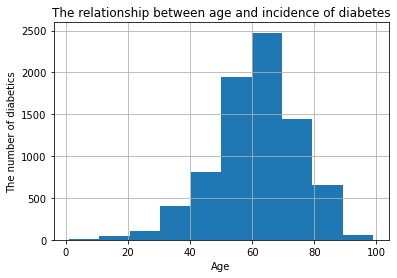

In [12]:
df[df['diabetes'] == 1]['age'].hist()
plt.xlabel('Age')
plt.ylabel('The number of diabetics')
plt.title('The relationship between age and incidence of diabetes');

I plot this chart to know the most age that suffer from diabetes.            
I found that most age is 60 to 70 year old.

### the average of patient that suffer from diabetes

In [13]:
df.groupby('diabetes')['age'].mean()

diabetes
0    35.208610
1    61.372529
Name: age, dtype: float64

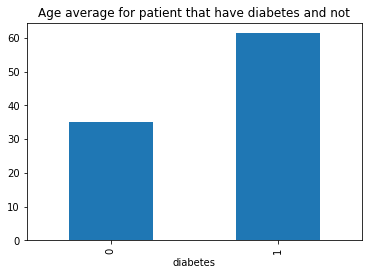

In [14]:
df.groupby('diabetes')['age'].mean().plot(kind = 'bar' )
plt.title('Age average for patient that have diabetes and not');

### What is the most gender that have diabetes?

In [15]:
gen_diab = df[df['diabetes'] == 1]
gen_diab.groupby('diabetes')['gender'].value_counts()

diabetes  gender
1         F         5606
          M         2337
Name: gender, dtype: int64

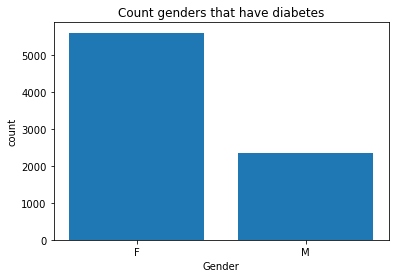

In [16]:
x = gen_diab.groupby('diabetes')['gender'].value_counts().tolist()
plt.bar(x = ['F','M'], height= x )
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Count genders that have diabetes');

Bar chart showed that females suffer from diabetes more than males

Q : What is the most age people drink alcohol?

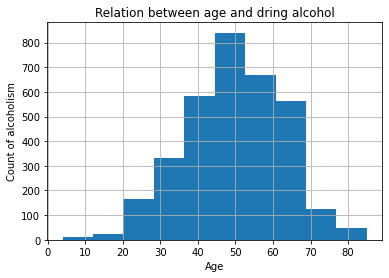

In [17]:
df[df['alcoholism'] == 1]['age'].hist()
plt.title('Relation between age and dring alcohol')
plt.xlabel('Age')
plt.ylabel('Count of alcoholism');

I plot this chart to show the most age that drink alcohol.                 
I found that most age is 45:51 years old.

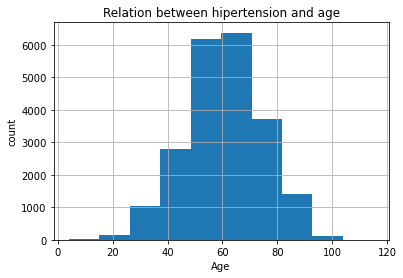

In [18]:
df[df['hipertension'] == 1]['age'].hist()
plt.title('Relation between hipertension and age')
plt.xlabel('Age')
plt.ylabel('count');

In [19]:
# print the smallest age
df[df['age']<15]['age'].value_counts()

 0     3539
 1     2273
 2     1618
 6     1521
 3     1513
 5     1489
 7     1427
 8     1424
 9     1372
 4     1299
 10    1274
 11    1195
 14    1118
 13    1103
 12    1092
-1        1
Name: age, dtype: int64

In [20]:
# Drop row that contian negative age
df.drop(df.index[df['age'] <= 0].tolist(),inplace = True)

Q : What is the most gender suffer from diabetes?

In [21]:
# print count of diabetes group by gender to now most gender suffer from diabetes
df.groupby('gender')['diabetes'].count()

gender
F    70118
M    36869
Name: diabetes, dtype: int64

Q : What is the most hospital resive patients?

In [22]:
df[df['no_show'] == 'No']['neighbourhood'].value_counts()

JARDIM CAMBURI       6154
MARIA ORTIZ          4369
RESISTÊNCIA          3360
JARDIM DA PENHA      3224
CENTRO               2590
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

### What is the gender that drinke alcohol very much? 

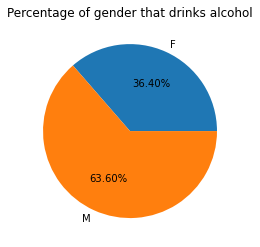

In [23]:
count_alc = df[df['alcoholism'] == 1].groupby('gender')['alcoholism'].value_counts().tolist()
plt.pie(x = count_alc, labels= ['F','M'], autopct='%1.2f%%')
plt.title('Percentage of gender that drinks alcohol');

Q: Number of patients that scholarship? Did all registered patients attend the examination?

In [24]:
#create new dataframe that contian the scholarship patients
df_sch = df[df['scholarship'] == 1]
df_sch

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No
31,3.112849e+11,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
33,7.653517e+12,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110423,1.751263e+14,5704561,F,2016-05-16 16:02:09+00:00,2016-06-08 00:00:00+00:00,34,RESISTÊNCIA,1,0,0,0,0,1,No
110426,9.691376e+09,5740289,M,2016-05-25 15:00:52+00:00,2016-06-08 00:00:00+00:00,13,RESISTÊNCIA,1,0,0,0,0,1,No
110473,7.555300e+11,5779851,M,2016-06-07 07:19:54+00:00,2016-06-07 00:00:00+00:00,2,NOVA PALESTINA,1,0,0,0,0,0,No
110479,4.455244e+12,5638153,F,2016-04-29 07:45:43+00:00,2016-06-06 00:00:00+00:00,34,RESISTÊNCIA,1,0,0,0,0,1,Yes


In [25]:
# print number of patient that go to hospital from scholarship patients
df_sch['no_show'].value_counts()

No     8238
Yes    2571
Name: no_show, dtype: int64

Patients that scholarship and show up more than No show

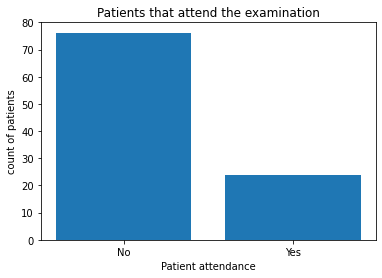

In [55]:
# plot chart that describe the percentage of patient that show up and scholarship
high = df_sch['no_show'].value_counts(normalize = True).mul(100)
label = ['No' , 'Yes']
plt.bar(x = label, height= high)
plt.title('Patients that attend the examination')
plt.xlabel('Patient attendance')
plt.ylabel('count of patients');

I plot this chart to show number patient that attend to show.         
The percentage of patients that scholarship and show up more than No show

In [27]:
df_sch['gender'].value_counts()

F    8826
M    1983
Name: gender, dtype: int64

Females that scholarship more than Males.

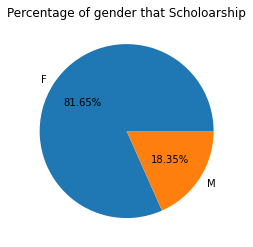

In [28]:
plt.pie(x = df_sch['gender'].value_counts(), labels=  ['F','M'] , autopct='%1.2f%%')
plt.title('Percentage of gender that Scholoarship');

The percentage of Females that scholarship more than Males.

In [29]:
# print number of patient that suffer from diabetes and has not scholarship
df[df['scholarship'] == 0]['diabetes'].value_counts()

0    88804
1     7374
Name: diabetes, dtype: int64

The patients that not scholarship and have diabetes more than patients have not diabetes.

Q: Is there a relationship between diabetes and alcoholism ?

In [30]:
# prnit the average of diabetes patients and drink alcohol
df[df['alcoholism'] == 1]['diabetes'].mean()

0.0988095238095238

The average of patients that are alcoholism and have diabetes not heigh.

In [31]:
#print number of patients that drink alcohol and suffer from diabetes
df[df['alcoholism'] == 1]['diabetes'].value_counts()

0    3028
1     332
Name: diabetes, dtype: int64

Patients that are alcoholism and not have diabetes more than patients have diabetes.          
This tell us that alcoholism have not strong effect for diabetes.

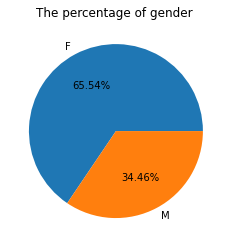

In [32]:
# This function use to print pie for any column in datafram
def pie_chart(dataframe, colname):
    '''This function take 2 arguments
         dataframe : dataframe name
         colname : column name that you want to bar diagram
         '''
   
    plt.pie(dataframe[colname].value_counts(), autopct='%1.2f%%', labels= dataframe[colname].value_counts().index)
    plt.title('The percentage of {} '.format(colname))
    
#call function to excute
pie_chart(df, 'gender')

This pie chart show that percentage of females more than Males

## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [33]:
# Create new column wait that contain the difference between appointment day and scheduled day and convert it to int
df['wait'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
#convert datetime to string
df['wait'] = df['wait'].astype(str)
# extract int number from string
df['wait'] = df['wait'].str.extract('(\d+)')
# convert it to int
df['wait'] = df['wait'].astype(int)

In [34]:
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [35]:
df['sms_received'].value_counts()

0    72402
1    34585
Name: sms_received, dtype: int64

In [36]:
# create new dataset that contian wait column equal 0
adb = df[df['wait'] == 0]

In [37]:
adb['sms_received'].value_counts()

0    37154
Name: sms_received, dtype: int64

In [38]:
df['sms_received'].value_counts() - adb['sms_received'].value_counts()

0    35248.0
1        NaN
Name: sms_received, dtype: float64

# Conclusion 
1- I used No show appointment database.         
2- I import the packages and load the database.                
3- I discaver the data , clean it and convert columns data type to correct data type to be easy to use.         
4- I started to plot diagrams to discover the relations between columns         
5- Many questions appear and i started to answer them                    
6- the important questions is What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?                  
7- I discaverd that the factor is sms_received (All patients that wait value equal 0 not receive sms).
8- I found that females have diabetes more than males.         
9- I found that Males drink alcohol more than Females.               
10- I found that drinking kohl is not always accompanied by diabetes.

# Limitation 
Females have diseases more than Males.                    
Males alcoholism more than Females.                  
All patients that not receive sms show up at same day of scheduled day.